In [1]:
import pickle
import os
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.layers import Dense, Dropout, Embedding
from keras.models import Input, Model
from keras.preprocessing import sequence
from tensorflow.python.framework import ops
from tcn import TCN
from sklearn.model_selection import train_test_split
from keras.models import load_model
import gpflow
from gpflow.test_util import notebook_niter
np.random.seed(123)

ops.reset_default_graph()

Using TensorFlow backend.


In [2]:
data = pickle.load(open( "dfs.data", "rb" ))

In [7]:
columns=data[400].columns

In [89]:
x=list()
y=list()
for i in range(0,34):
    y.append(np.asarray((data[400][columns[i]].dropna())))
    x.append(np.asarray((data[400][columns[i]].dropna()).index))

In [97]:
for i in range(32):
    y[i]=y[i]/y[i].max()

In [98]:
%matplotlib inline
import matplotlib.pyplot as plt

In [81]:
x[0].shape

(203,)

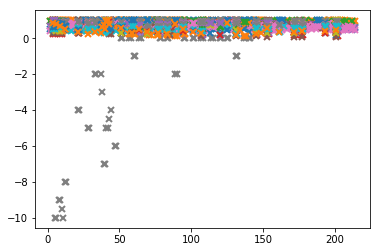

In [100]:
for i in range(32):
    plt.plot(x[i], y[i], 'x', mew=2)

In [101]:
x_aug=list()
y_aug=list()
for i in range(32):
    x_aug.append(np.hstack([x[i].reshape(len(x[i]),1),i*np.ones_like(x[i]).reshape(len(x[i]),1)]))
    y_aug.append(np.hstack([y[i].reshape(len(y[i]),1),i*np.ones_like(y[i]).reshape(len(y[i]),1)]))
X_aug=np.vstack(x_aug[0:32]).astype(float)
Y_aug=np.vstack(y_aug[0:32]).astype(float)

In [102]:
Y_aug

array([[ 0.5078125 ,  0.        ],
       [ 0.5       ,  0.        ],
       [ 0.5078125 ,  0.        ],
       ...,
       [ 0.38666667, 31.        ],
       [ 0.40666667, 31.        ],
       [ 0.46666667, 31.        ]])

In [103]:
input_dim = 1
output_dim=34
Q = 34   #number of latent functions
R = 34   #rank of coreg matrix

In [104]:
k = [gpflow.kernels.Matern32(input_dim, lengthscales=0.25*np.random.randn(input_dim)) for q in range(Q)]

In [105]:
coreg = [gpflow.kernels.Coregion(input_dim, output_dim=output_dim, rank=R, active_dims=[1]) for q in range(Q)]
kern = coreg[0] * k[0]
for q in range(1,Q):
    kern += coreg[q] * k[q]

In [106]:
lik = gpflow.likelihoods.SwitchedLikelihood([gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT(),gpflow.likelihoods.StudentT()]) 

In [107]:
m = gpflow.models.VGP(X_aug, Y_aug, kern=kern, likelihood=lik, num_latent=1) 

In [108]:
m.compile()

In [109]:
gpflow.train.ScipyOptimizer().minimize(m, maxiter=40000)

/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:97: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


InternalError: Blas GEMM launch failed : a.shape=(34, 34), b.shape=(34, 34), m=34, n=34, k=34
	 [[Node: VGP-63b40c45-410/MatMul_16 = MatMul[T=DT_DOUBLE, transpose_a=false, transpose_b=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Coregion-acf3c68c-126/W/unconstrained/read, Coregion-acf3c68c-126/W/unconstrained/read)]]
	 [[Node: VGP-63b40c45-410/strided_slice_3/_7493 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_2823_VGP-63b40c45-410/strided_slice_3", tensor_type=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'VGP-63b40c45-410/MatMul_16', defined at:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/local/lib/python3.5/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/usr/local/lib/python3.5/dist-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.5/dist-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/usr/local/lib/python3.5/dist-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-107-1cbb3b76f3dc>", line 1, in <module>
    m = gpflow.models.VGP(X_aug, Y_aug, kern=kern, likelihood=lik, num_latent=1)
  File "/usr/local/lib/python3.5/dist-packages/gpflow/core/compilable.py", line 90, in __init__
    self.build()
  File "/usr/local/lib/python3.5/dist-packages/gpflow/core/node.py", line 156, in build
    self._build()
  File "/usr/local/lib/python3.5/dist-packages/gpflow/models/model.py", line 79, in _build
    likelihood = self._build_likelihood()
  File "/usr/local/lib/python3.5/dist-packages/gpflow/decors.py", line 67, in tensor_mode_wrapper
    result = method(obj, *args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/gpflow/models/vgp.py", line 106, in _build_likelihood
    K = self.kern.K(self.X) + tf.eye(self.num_data, dtype=settings.float_type) * \
  File "/usr/local/lib/python3.5/dist-packages/gpflow/kernels.py", line 756, in K
    return reduce(tf.add, [k.K(X, X2) for k in self.kernels])
  File "/usr/local/lib/python3.5/dist-packages/gpflow/kernels.py", line 756, in <listcomp>
    return reduce(tf.add, [k.K(X, X2) for k in self.kernels])
  File "/usr/local/lib/python3.5/dist-packages/gpflow/kernels.py", line 764, in K
    return reduce(tf.multiply, [k.K(X, X2) for k in self.kernels])
  File "/usr/local/lib/python3.5/dist-packages/gpflow/kernels.py", line 764, in <listcomp>
    return reduce(tf.multiply, [k.K(X, X2) for k in self.kernels])
  File "/usr/local/lib/python3.5/dist-packages/gpflow/decors.py", line 67, in tensor_mode_wrapper
    result = method(obj, *args, **kwargs)
  File "/usr/local/lib/python3.5/dist-packages/gpflow/kernels.py", line 694, in K
    B = tf.matmul(self.W, self.W, transpose_b=True) + tf.matrix_diag(self.kappa)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/math_ops.py", line 2022, in matmul
    a, b, transpose_a=transpose_a, transpose_b=transpose_b, name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gen_math_ops.py", line 2516, in _mat_mul
    name=name)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 3160, in create_op
    op_def=op_def)
  File "/usr/local/lib/python3.5/dist-packages/tensorflow/python/framework/ops.py", line 1625, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InternalError (see above for traceback): Blas GEMM launch failed : a.shape=(34, 34), b.shape=(34, 34), m=34, n=34, k=34
	 [[Node: VGP-63b40c45-410/MatMul_16 = MatMul[T=DT_DOUBLE, transpose_a=false, transpose_b=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](Coregion-acf3c68c-126/W/unconstrained/read, Coregion-acf3c68c-126/W/unconstrained/read)]]
	 [[Node: VGP-63b40c45-410/strided_slice_3/_7493 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_2823_VGP-63b40c45-410/strided_slice_3", tensor_type=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


In [ ]:
xtest = np.linspace(0, len(data[0]), len(data[0])+1)[:,None]
plt.figure(figsize=(20,5))
for i in range(32):  
    line, = plt.plot(x[i], y[i], '.')
    mu, var = m.predict_f(np.hstack((xtest, i+np.zeros_like(xtest))))
    plt.fill_between(xtest[:,0], (mu-np.sqrt(var))[:,0], (mu+np.sqrt(var))[:,0], color=line.get_color(), alpha=0.2)